In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joypy import joyplot
from pyfonts import load_font
from highlight_text import fig_text
from drawarrow import fig_arrow

In [2]:
pacifico = load_font(
  font_url="https://github.com/google/fonts/blob/main/ofl/pacifico/Pacifico-Regular.ttf?raw=true"
)

In [3]:
weekly_gas_prices = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-07-01/weekly_gas_prices.csv')

In [4]:
weekly_gas_prices.head()

,date,fuel,grade,formulation,price
0,1990-08-20,gasoline,regular,all,1.191
1,1990-08-20,gasoline,regular,conventional,1.191
2,1990-08-27,gasoline,regular,all,1.245
3,1990-08-27,gasoline,regular,conventional,1.245
4,1990-09-03,gasoline,regular,all,1.242


In [5]:
weekly_gas_prices['date'] = pd.to_datetime(weekly_gas_prices['date'])

In [6]:
pivot_df = weekly_gas_prices.pivot_table(index='date', columns='fuel', values='price', aggfunc='mean').reset_index()

In [7]:
pivot_df["year"] = pivot_df['date'].dt.year

In [8]:
pivot_df = pivot_df.dropna(subset=["diesel"])

In [9]:
pivot_df.head()

fuel,date,diesel,gasoline,year
181,1994-03-21,1.106,1.007,1994
182,1994-03-28,1.107,1.012,1994
183,1994-04-04,1.109,1.011,1994
184,1994-04-11,1.108,1.028,1994
185,1994-04-18,1.105,1.033,1994


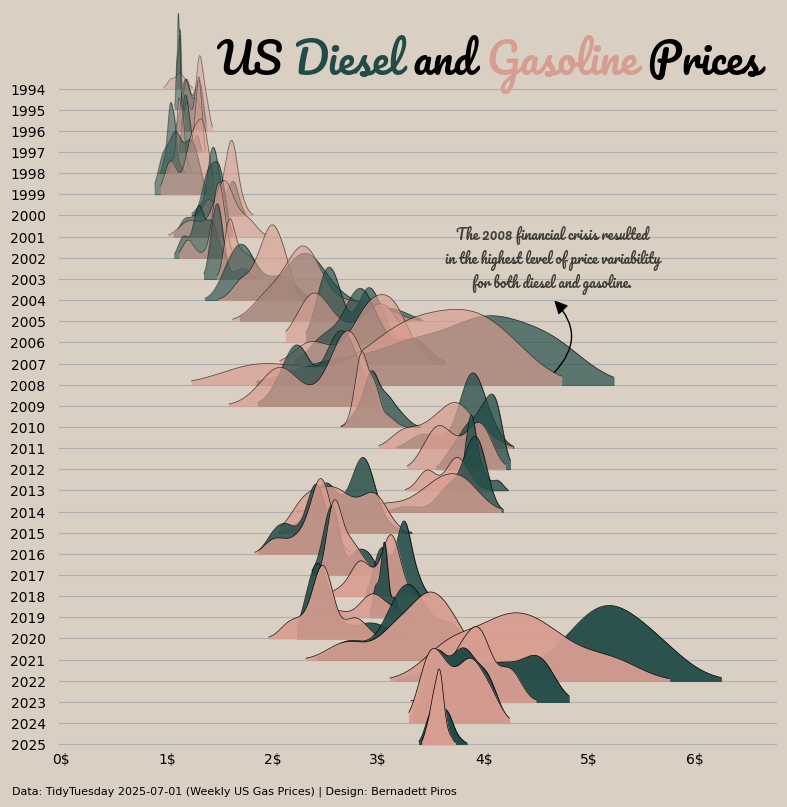

In [10]:
labels=pivot_df.year.unique().tolist() 

fig, axes = joyplot(pivot_df,
                    by="year",
                    column=['diesel','gasoline'],
                    color=['#224B47', '#D89D91'],
                    labels=labels,
                    ylim="own",
                    range_style='own',
                    fade=True,
                    grid="y",
                    linewidth=0.5,
                    legend=False,
                    figsize=(8, 8),
                    background="#D9CFC2")

location = [0, 1, 2, 3, 4, 5, 6]
labels = ["0$", "1$", "2$", "3$", "4$", "5$", "6$"]

for ax in axes:
    ax.tick_params(length=0)    
    ax.set_xticks(location, labels=labels)

fig_arrow(
  [0.7, 0.525],
  [0.7, 0.62],
  color="black",
  radius=0.5
)

fig.text(0.7, 0.625, "The 2008 financial crisis resulted\nin the highest level of price variability\nfor both diesel and gasoline.",
         alpha=0.7, font=pacifico, ha="center", va="bottom")

fig.set_facecolor("#D9CFC2")

fig_text(0.28, 0.95, s="US <Diesel> and <Gasoline> Prices", size=30, font=pacifico, 
         highlight_textprops=[
             {"color": "#224B47"},
             {"color": "#D89D91"}
    ])

fig.text(0.025, 0, "Data: TidyTuesday 2025-07-01 (Weekly US Gas Prices) | Design: Bernadett Piros", size=8)

plt.show()

#fig.savefig("2025-07-01.png", bbox_inches='tight', pad_inches=0.2)